# Introuduction:
This is the lab-2 introducing the basic version of a Deep Learning Model implenentation in pytorch.

# Class Inheritence
This section introduces the basic strucure of class inheritance which we will follow in pytorch for inheriting our classes from torch.nn.Modules.

In [ ]:
class parent ():
    def __init__(self):
        print("Constructor of Parent Class")
class child(parent):
    def __init__(self):
        super().__init__()
        print("Constructor of Child Class")

obj = child()


Constructor of Parent Class
Constructor of Child Class


Now Lets define a DenseLayer class

In [23]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [7]:

class ourDenseLayer(torch.nn.Module):
    def __init__(self,num_input,num_output):
        super(ourDenseLayer, self).__init__()
        self.w = torch.nn.Parameter(torch.rand(num_input,num_output))
        self.bias = torch.nn.Parameter(torch.rand(num_output))
    def forward(self,x):
        z = torch.matmul(x, self.w) +self.bias
        y = torch.sigmoid(z)
        return y




In [ ]:
num_input = 2
num_output = 3
layer = ourDenseLayer(num_input,num_output)
print(f"layer.w: {layer.w} having shape: {layer.w.shape} is {layer.w.dim()}-dimensional")
print(f"layer.bias: {layer.bias} having shape {layer.bias.shape} is {layer.bias.dim()}-dimensional")

x_input= torch.tensor([[1,2.]])
print(f"x_input: {x_input} having shape:{x_input.shape} is {x_input.dim()}-dimensional")

y=layer(x_input)
print(f"y output: {y} having shape:{y.shape} is {y.dim()}-dimensional")

layer.w: Parameter containing:
tensor([[0.3270, 0.3158, 0.8558],
        [0.3883, 0.5105, 0.5351]], requires_grad=True) having shape: torch.Size([2, 3]) is 2-dimensional
layer.bias: Parameter containing:
tensor([0.3450, 0.5998, 0.4409], requires_grad=True) having shape torch.Size([3]) is 1-dimensional
x_input: tensor([[1., 2.]]) having shape:torch.Size([1, 2]) is 2-dimensional
y output: tensor([[0.8098, 0.8740, 0.9143]], grad_fn=<SigmoidBackward0>) having shape:torch.Size([1, 3]) is 2-dimensional


# Defining NN using Sequential
NOw defining a NN in pytorch is somehow automatic and not manual as shown in ourDenseLayer example. Now instead of using single module we will use sequential which act as container for multiple layers (linear and non-linear). In the example below it takes a linear layer followed by non-linear(sigmoid).

In [ ]:
input_nodes = 3 # This is the Weights W which will be multiplied with x_input so their dimensions should match. W*x_input.
output_nodes = 4
model = nn.Sequential(nn.Linear(input_nodes,output_nodes),nn.Sigmoid())
x_input = torch.tensor([[1,2,3.]])
y = model(x_input)


print(f"x_input:{x_input} having shape{x_input.shape} is {x_input.dim()}-dimensional")
print(f" y_output: {y} having shape:{y.shape} is {y.dim()}-dimensional")

x_input:tensor([[1., 2., 3.]]) having shapetorch.Size([1, 3]) is 2-dimensional
 y_output: tensor([[0.8024, 0.1951, 0.3637, 0.6053]], grad_fn=<SigmoidBackward0>) having shape:torch.Size([1, 4]) is 2-dimensional


Although using the `nn.Sequential` is simple but if you want custom architecture, custom layers, custom forward pass  and custom activation function then we can use the `nn.Module` to create a subclass as we have seen in ourDenseLayer example.

In [3]:
class linearWithSigmoid(nn.Module):
    def __init__(self,num_inputs,num_outputs):
        super().__init__()
        #super(lineraWithSigmoid, self).__init__() # This is an older way of calling the parent class constructor
        self.linear = nn.Linear(num_inputs,num_outputs)
        self.activation = nn.Sigmoid()

    def forward(self,inputs):
        z = self.linear(inputs)
        y = self.activation(z)
        return y

In [4]:
input_nodes = 3 # This is the Weights W which will be multiplied with x_input so their dimensions should match. W*x_input.
output_nodes = 4
layer = linearWithSigmoid(input_nodes,output_nodes)
x_input = torch.tensor([[1,2,3.]])
y = layer(x_input)
print(f"x_input(X) shape : {x_input.shape} is {x_input.dim()}-dimensional")
print(f" y_outputshape:{y.shape} is {y.dim()}-dimensional")


x_input(X) shape : torch.Size([1, 3]) is 2-dimensional
 y_outputshape:torch.Size([1, 4]) is 2-dimensional


# Model Returing Input as Output
Sometime we may want out model to return the input as output without any purterbation or change. We can implement this type of behaviour in forward pass. Suppose in this example we have a boolean variable `isidentity`  to control this behaviour.

In [5]:
class linearWithIdentity(nn.Module):
    def __init__(self,num_inputs,num_outputs):
        super().__init__()
        self.linear = nn.Linear(num_inputs,num_outputs)
    def forward(self,num_inputs,isidentity = False):
        if isidentity:
            return num_inputs


In [6]:
input_nodes = 3
output_nodes = 4

model = linearWithIdentity(input_nodes,output_nodes)
x_input = torch.tensor([[[1,2,3.]]])

y = model(x_input, isidentity = True)

print(f"Input :{x_input} and output: {y}")


Input :tensor([[[1., 2., 3.]]]) and output: tensor([[[1., 2., 3.]]])


# Backpropatation
In PyTorch, when a tensor has requires_grad=True, it means that operations involving this tensor will be tracked for automatic differentiation. During the backward pass (backpropagation), gradients — which are the partial derivatives of a loss (or output) with respect to the input tensor — are computed and stored in the .grad attribute of that tensor.
Suppose x is an input tensor and y is some output tensor (e.g., a loss value). If x was defined with requires_grad=True, then calling y.backward() will compute the gradient of y with respect to x, and store it in x.grad.
Lets compute the gradient of y i.e.  
$y = x^2 $:

In [ ]:
x = torch.tensor(3.,requires_grad= True)
y = x**2
# Now to compute the gradient of y with respect to x, we call the backward method on y.
y.backward()
# The gradient of y with respect to x is now stored in x.grad
dy_dx = x.grad
print("dy_dx of y=x^2 at x=3.0 is: ", dy_dx.item())
print(f'The y is {y} and dy_dx is {dy_dx}')
print(f"Value of x.grade is {x.grad}")


dy_dx of y=x^2 at x=3.0 is:  6.0
The y is 9.0 and dy_dx is 6.0
Value of x.grade is 6.0


# Loss Function:
In NN we use differentiation and stogastic gradient descent to optimize the loss function. Let's use an example to find the minimum of loss function  
$L = (x-x_f)^2$  
Here x_f is the variable for a desire value we are trying to optimize for. L is the loss function we are trying to minimize

Iniliazing x with random value: 0.7085890173912048


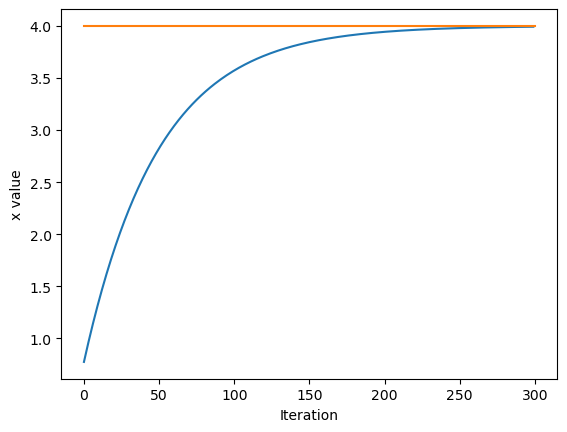

In [28]:
x = torch.rand(1)
print(f"Iniliazing x with random value: {x.item()}")

learning_rate = 1e-2
history = []
x_f= 4

# We will run the gradient descent for number of iterations
# At each iteration we compute the loss, derivative of the loss wit respect to x and update the value of x.
for i in range(300):
    x = torch.tensor([x], requires_grad=True)
    #Compute the loss function
    loss = (x - x_f)**2
    # Compute the gradient of the loss with respect to x
    loss.backward()
    # Update the value of x using the gradient descent formula
    x = x.item() - learning_rate * x.grad
    history.append(x.item())

#plotting the value of X as we optimize toward Xf
plt.plot(history)
plt.plot([0,300],[x_f,x_f])

plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()